# Visualized Result from Predicted Articulation
- created: 12 Apr 2020

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals
import librosa
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import librosa.display
from matplotlib import cm
from functools import partial
import seaborn as sns

import sklearn
from os import makedirs
import os, sys
from os.path import join
import shutil
from IPython import display
import scipy.stats
import fn_tools as utils
%matplotlib inline

In [2]:
np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

## Compare Model 
- Compare model on predefined dataset

In [18]:
# monosyllable
df_mono_result, df_mono_raw = utils.compute_formant_result_table([0,1,38, 37, 3, 34])
df_mono_result

,MODEL,F1 ERROR,F2 ERROR,F3 ERROR,F1 SD,F2 SD,F3 SD,F1 CF,F2 CF,F3 CF
0,0.0,77.376180,151.495836,161.865374,149.148954,252.085012,288.718249,16.029418,27.092219,31.029286
1,1.0,13.144993,29.270096,48.755726,10.017511,25.649508,65.528021,1.076607,2.756618,7.042463
2,38.0,9.568537,15.032832,24.983781,9.698486,18.179538,40.437850,1.042321,1.953801,4.345959
3,37.0,7.897659,7.595243,14.214099,5.804634,5.088276,17.692091,0.623839,0.546850,1.901414
4,3.0,9.725097,14.008435,18.718187,9.788357,16.801598,24.940458,1.051980,1.805711,2.680415
5,34.0,8.449208,15.125966,19.837977,7.699799,15.851576,21.370515,0.827517,1.703609,2.296744


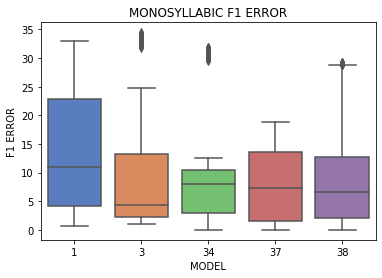

In [19]:
plt.title('MONOSYLLABIC F1 ERROR')
sns.boxplot(y='F1 ERROR', x='MODEL', data=df_mono_raw[df_mono_raw['MODEL'] != 0.0], width=0.8,palette="muted")
plt.savefig('monosyllabic_f1_error.png')

In [ ]:
plt.title('MONOSYLLABIC F2 ERROR')
sns.boxplot(y='F2 ERROR', x='MODEL', data=df_mono_raw[df_mono_raw['MODEL'] != 0.0], width=0.8, palette="muted")
plt.savefig('monosyllabic_f2_error.png')

In [4]:
# disyllable
df_di_result, df_di_raw = utils.compute_formant_result_table([7,8,30,31,10,27,65, 66 ])
# df_di_result, df_di_raw = utils.compute_formant_result_table([57, 58,63,59,60,61,62 ])
df_di_result

,MODEL,F1 ERROR,F2 ERROR,F3 ERROR,F1 SD,F2 SD,F3 SD,F1 CF,F2 CF,F3 CF
0,7.0,119.229665,171.341294,226.898822,202.919443,267.489603,366.966235,4.546402,5.993094,8.221864
1,8.0,8.771355,38.696628,51.711392,8.849708,37.458613,64.951580,0.198277,0.839259,1.455238
2,30.0,3.021298,12.487902,12.194612,2.815304,11.521625,15.061775,0.063077,0.258142,0.337458
3,31.0,2.732753,7.741731,8.377602,1.899544,8.620020,6.736993,0.042559,0.193131,0.150942
4,10.0,3.276642,5.528576,15.675599,2.695195,4.836735,23.187289,0.060386,0.108367,0.519510
5,27.0,2.396627,7.179873,10.703410,1.599645,6.143701,10.503186,0.035840,0.137649,0.235323
6,65.0,3.328803,8.432714,12.228843,3.480715,9.380453,11.670168,0.077985,0.210169,0.261470
7,66.0,2.702345,11.735144,14.349858,2.395179,11.960431,16.592800,0.053664,0.267973,0.371761


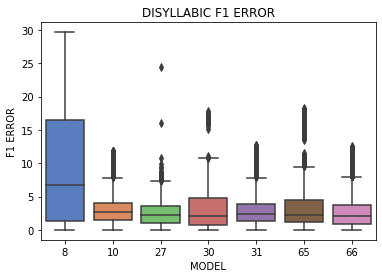

In [5]:
plt.title('DISYLLABIC F1 ERROR')
sns.boxplot(y='F1 ERROR', x='MODEL', data=df_di_raw[df_di_raw['MODEL'] != 7.0], width=0.8,palette="muted")
plt.savefig('disyllabic_f1_error.png')

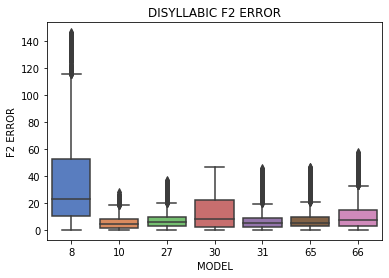

In [6]:
plt.title('DISYLLABIC F2 ERROR')
sns.boxplot(y='F2 ERROR', x='MODEL', data=df_di_raw[df_di_raw['MODEL'] != 7.0], width=0.8,palette="muted")
plt.savefig('disyllabic_f2_error.png')

## Eval Mono Vowel

In [20]:
exp_num = 37
utils.compute_each_vowel_formant_eval_mono(exp_num)

,F1 ERROR,F2 ERROR,F3 ERROR
0,1.412738,1.637597,4.376525
1,15.468679,1.792394,5.720806
2,17.382157,4.189752,1.086978
3,5.932788,0.059123,1.240201
4,8.203168,5.180267,1.317965
5,12.622591,2.819977,2.670789
6,0.673650,3.171296,0.407047
7,8.810967,1.323988,0.640701
8,2.164554,5.715307,1.768286
9,0.541260,0.171925,0.498232


## Eval Disyllablic vowel utterance 

In [31]:
exp_num = 31
res_df = utils.compute_each_vowel_formant_eval_di(exp_num)
res_df.head()

,Pho,1F1 ERROR,1F2 ERROR,1F3 ERROR,2F1 ERROR,2F2 ERROR,2F3 ERROR,Pho1,Pho2
0,a;i,1.786384,2.113680,2.459463,2.276774,0.403464,1.343933,a,i
1,a;u,1.806749,2.120088,2.435037,4.614748,4.207724,0.920410,a,u
2,a;e,1.805630,2.119656,2.436717,1.749203,0.542571,1.864474,a,e
3,a;E,1.789689,2.086215,2.467268,3.768412,3.007691,1.667724,a,E
4,a;o,1.791359,2.114504,2.450500,2.763294,5.629911,1.975098,a,o


In [32]:
res_1 = res_df.groupby(['Pho1']).mean()[['1F1 ERROR', '1F2 ERROR','1F3 ERROR']]

utils.change_label_set_1(res_1, col='Pho1')
res_1 = utils.set_datapoint_index(res_1, col='Pho1')
utils.custome_reindex_type2(res_1).drop(['Pho1'], axis=1)

,1F1 ERROR,1F2 ERROR,1F3 ERROR
Label_idx,,,
a:,1.794597,2.113555,2.450561
i:,3.986013,0.686436,1.396852
u:,2.952870,15.461520,1.145856
e:,2.302639,0.150792,0.322464
ɛ:,3.095573,1.472174,1.844582
ə:,3.845333,2.306678,0.747566
œ:,0.553236,0.488442,0.373685
o:,2.339079,6.492447,1.738473
ɔ:,1.668489,4.874043,0.402013


In [33]:
res_2 = res_df.groupby(['Pho2']).mean()[['2F1 ERROR', '2F2 ERROR','2F3 ERROR']]

utils.change_label_set_1(res_2, col='Pho2')
res_2 = utils.set_datapoint_index(res_2, col='Pho2')
utils.custome_reindex_type2(res_2).drop(['Pho2'], axis=1)

,2F1 ERROR,2F2 ERROR,2F3 ERROR
Label_idx,,,
a:,1.657700,1.937962,2.102323
i:,2.632365,0.408553,1.407383
u:,4.269466,11.104879,1.580418
e:,1.749453,0.359341,1.511374
ɛ:,3.910612,3.053336,1.811647
ə:,4.276008,2.376790,1.134848
œ:,0.915616,1.064334,0.173895
o:,3.236722,5.622693,2.205023
ɔ:,1.217204,1.375042,0.749805


## Predict Disyllablic vowel utterance 

In [27]:
exp_num = '31_2'
res_df = utils.compute_each_vowel_formant_predict_di(exp_num)
res_df.head()

,Pho,1F1 ERROR,1F2 ERROR,1F3 ERROR,2F1 ERROR,2F2 ERROR,2F3 ERROR,Pho1,Pho2
0,a;i,15.482533,7.046034,23.107118,22.722456,11.780924,10.993633,a,i
1,a;u,13.565195,9.712401,22.174894,13.134603,11.350763,1.954795,a,u
2,a;e,13.342793,14.794742,16.590360,25.119305,11.061277,2.430186,a,e
3,a;E,16.510458,7.730576,19.429001,15.079799,19.028180,8.244988,a,E
4,a;M,11.002462,5.947255,24.510255,10.439513,5.761122,12.699054,a,M


In [28]:
res_1 = res_df.groupby(['Pho1']).mean()[['1F1 ERROR', '1F2 ERROR','1F3 ERROR']]

utils.change_label_set_2(res_1, col='Pho1')
res_1 = utils.set_datapoint_index(res_1, col='Pho1')
utils.custome_reindex_type3(res_1).drop(['Pho1'], axis=1)

,1F1 ERROR,1F2 ERROR,1F3 ERROR
Label_idx,,,
a:,19.507460,14.196736,14.830126
i:,15.673814,25.277166,12.240630
u:,14.028687,22.788311,9.309641
e:,16.056556,18.254688,12.766760
ɛ:,16.474011,26.143845,14.004463
ɯ:,11.498191,12.670928,13.577049
ɤ:,13.096931,11.144047,13.895686
o:,19.354953,22.559598,11.161042
ɔ:,14.689905,18.897416,13.653970


In [29]:
res_2 = res_df.groupby(['Pho2']).mean()[['2F1 ERROR', '2F2 ERROR','2F3 ERROR']]

utils.change_label_set_2(res_2, col='Pho2')
res_2 = utils.set_datapoint_index(res_2, col='Pho2')
utils.custome_reindex_type3(res_2).drop(['Pho2'], axis=1)

,2F1 ERROR,2F2 ERROR,2F3 ERROR
Label_idx,,,
a:,23.257828,15.191792,15.508700
i:,20.974552,24.841330,12.543367
u:,18.136804,30.464396,12.164774
e:,20.542723,18.136711,13.113296
ɛ:,22.760292,22.440220,14.625539
ɯ:,14.304043,12.632642,14.306665
ɤ:,20.526248,10.900865,13.554702
o:,21.007572,19.221522,10.132983
ɔ:,20.867063,17.942408,13.102512


## Predict Formant Range

In [13]:
def get_min_max_mean_each_vowel_formant_predict_di(exp_num):
    path = '../../experiment/result/predict_{}/formant/'.format(exp_num)


    with open('../../data/d_records/record_all/syllable_name.txt') as f:
        label = np.array([word.strip()[0]+';'+word.strip()[1] for line in f for word in line.split(',')])

    a1 = np.load(join(path, 'actual_F1.npy'))
    a2 = np.load(join(path, 'actual_F2.npy'))

    e1 = np.load(join(path, 'estimated_F1.npy'))
    e2 = np.load(join(path, 'estimated_F2.npy'))

    a1 = utils.cut_head_and_tail(utils.numpy_fillna(a1)).astype('float')
    a2 = utils.cut_head_and_tail(utils.numpy_fillna(a2)).astype('float')

    e1 = utils.cut_head_and_tail(utils.numpy_fillna(e1)).astype('float')
    e2 = utils.cut_head_and_tail(utils.numpy_fillna(e2)).astype('float')
    
    e1 = e1.reshape((e1.shape[0]//2,2,e1.shape[1]))
    e2 = e2.reshape((e2.shape[0]//2,2,e2.shape[1]))
    
    a11_min = np.min(e1[:,0,:], axis=1)
    a12_min = np.min(e2[:,0,:], axis=1)
    a21_min = np.min(e1[:,1,:], axis=1)
    a22_min = np.min(e2[:,1,:], axis=1)

    a11_max = np.max(e1[:,0,:], axis=1)
    a12_max = np.max(e2[:,0,:], axis=1)
    a21_max = np.max(e1[:,1,:], axis=1)
    a22_max = np.max(e2[:,1,:], axis=1)
    
    a11_mean = np.median(e1[:,0,:], axis=1)
    a12_mean = np.median(e2[:,0,:], axis=1)
    a21_mean = np.median(e1[:,1,:], axis=1)
    a22_mean = np.median(e2[:,1,:], axis=1)
 


    res_df = pd.DataFrame({ 'Pho':label, 
                           '1F1 MIN': a11_min,'1F2 MIN':a12_min, '2F1 MIN': a21_min,'2F2 MIN':a22_min,
                           '1F1 MAX': a11_max,'1F2 MAX':a12_max, '2F1 MAX': a21_max,'2F2 MAX':a22_max,
                           '1F1 MEAN': a11_mean,'1F2 MEAN':a12_mean, '2F1 MEAN': a21_mean,'2F2 MEAN':a22_mean
                          })

    res_df['Pho1'], res_df['Pho2'] = res_df['Pho'].str.split(';', 1).str
    
    return res_df

In [34]:
exp_num = '31_2'
res_df = get_min_max_mean_each_vowel_formant_predict_di(exp_num)
res_df.head()

,Pho,1F1 MIN,1F2 MIN,2F1 MIN,2F2 MIN,1F1 MAX,1F2 MAX,2F1 MAX,2F2 MAX,1F1 MEAN,1F2 MEAN,2F1 MEAN,2F2 MEAN,Pho1,Pho2
0,a;i,649.932501,1454.021067,277.086325,2157.229305,652.022409,1459.468124,280.324955,2182.096345,650.923147,1458.370432,278.580004,2175.064332,a,i
1,a;u,633.833781,1383.922531,357.096910,685.757000,637.460652,1394.188365,397.389140,822.405438,635.304235,1389.559379,360.974189,694.851117,a,u
2,a;e,680.102217,1297.760567,372.245662,1918.913461,687.618310,1307.127180,408.163721,2024.905493,682.296916,1299.767748,372.878084,2022.594546,a,e
3,a;E,682.809757,1391.692142,585.821832,1683.235528,687.190230,1395.818005,590.057518,1699.376670,684.886386,1394.737090,586.350733,1695.851800,a,E
4,a;M,664.698954,1421.274937,343.290286,1725.066585,667.748718,1423.939813,346.572788,1742.056887,665.877170,1423.411152,343.621366,1729.934474,a,M


In [35]:
res_1 = res_df.groupby(['Pho1']).mean()[['1F1 MEAN', '1F2 MEAN']]

utils.change_label_set_2(res_1, col='Pho1')
res_1 = utils.set_datapoint_index(res_1, col='Pho1')
utils.custome_reindex_type3(res_1).drop(['Pho1'], axis=1)

,1F1 MEAN,1F2 MEAN
Label_idx,,
a:,564.881920,1235.655716
i:,262.898942,1690.236456
u:,325.275132,734.774648
e:,367.861418,1674.655982
ɛ:,528.267555,1480.578300
ɯ:,340.617133,1335.180389
ɤ:,461.995395,1302.937122
o:,422.825126,807.475205
ɔ:,563.519100,1085.298038


In [36]:
res_1 = res_df.groupby(['Pho2']).mean()[['2F1 MEAN', '2F2 MEAN']]

utils.change_label_set_2(res_1, col='Pho1')
res_1 = utils.set_datapoint_index(res_1, col='Pho1')
utils.custome_reindex_type3(res_1).drop(['Pho1'], axis=1)

,2F1 MEAN,2F2 MEAN
Label_idx,,
a:,590.698008,1253.221316
i:,264.023815,1952.802264
u:,326.546630,784.152857
e:,360.581698,1756.044453
ɛ:,536.178568,1475.806364
ɯ:,305.285657,1321.889398
ɤ:,437.893102,1259.498157
o:,385.535103,721.000220
ɔ:,564.455072,1036.554792
